# Predicting Loan Status

This project was completed as part of Lighthouse Labs' Data Science Bootcamp. The objective of this project is to predict a customer's loan eligibility based on customer details that are provided during the application process. This notebook covers the steps taken to generate hypotheses, perform exploratory data analysis, transform data, and perform predictive modelling using classification algorithms. The best model will be deployed in a flask web app and hosted in the cloud using AWS.

## Introduction

For most people, purchasing a property requires a loan from financial companies. Financial companies need to ensure that customers they lend to are trustworthy and capable of repaying their loans. As such, it would be extremely beneficial for such companies if a tool exists that will allow them to predict a customer's loan eligibility status based on customer information, like applicant income and property area. The dataset for this project can be found [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view).

We first begin by importing the relevant libraries, like numpy, pandas, and seaborn. We then import the data and inspect the columns for the variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets/data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


The data contains the following columns:
    
| Variable | Description | Type |
| :-: | :-: | :-: |
| Gender | Male/Female | Categorical
| Married | Applicant's marriage status (Y/N) | Categorical
| Dependents | Number of dependents | Categorical
| Education | Applicant's education level | Categorical
| Self_Employed | Self-employed (Y/N) | Categorical 
| ApplicantIncome | Applicant's monthly income | Numerical
| CoapplicantIncome | Co-applicant's monthly income | Numerical
| LoanAmount | Loan amount (thousands) | Numerical
| Loan_Amount_Term | Loan term (months) | Numerical
| Credit_History | Credit history meets guidelines (Y/N) | Categorical
| Property_Area | Property location | Categorical
| Loan_Status | Loan approved (Y/N) | Categorical

As evident, Loan_Status corresponds to the target variable; the remaining features correspond to the input variables. In other words, we hope to predict loan status using customer properties, such as gender, marriage status and applicant income.

## Hypothesis Generation

From literature, we can make the following hypotheses:

1. Applicant's with a greater income and good credit history are more trustworthy, hence more likely to get loans approved.
2. Applicant's getting loans for properties at urban centers are more likely to get approved than rural centers. In case the loan repayment fails, it is beneficial for financial companies to retain assetts in urban areas. 
3. Applicants who are self-employed may be more likely to receive loans. Most mortgage lenders require at least two years of steady self-employment before you can qualify for a home loan.
4. Education may not be directly linked to loan status, but can certainly play a role in income and employment status, which in turn can play a role in loan eligibility.
5. The loan amount and loan terms may not be directly linked to loan status, but may be viewed in relation with other features, like applicant income and credit history. If applicants earn more and have good credit history, finanacial companies may be more willing to lend large amounts of money. 

## Exploratory Data Analysis

Before we can perform transformation and predictive modelling on the dataset, we must perform exploratory data analysis to identify patterns in our data and further explore our hypothesis. We begin by uncovering basic information on the dataset.

<b> How many samples are in the dataset? How many missing values are there? Basic statistics of some of the numerical variables? </b>

In [3]:
print("Rows, Columns:", df.shape)
print(df.isna().sum())

Rows, Columns: (614, 13)
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [4]:
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


The dataset contains 614 rows, each corresponding to information about a single applicant. There are a handful of missing values in both numerical and categorical variables. Given the dataset is relatively small, removing the empty values may be problematic; thus, we must find a way to impute these missing values. Range in numerical variables appear to make sense. 

### Exploring Numerical and Categorical Variables

<b> What is the gender distribution amongst the dataset? What is the education levels of these applicants?</b>

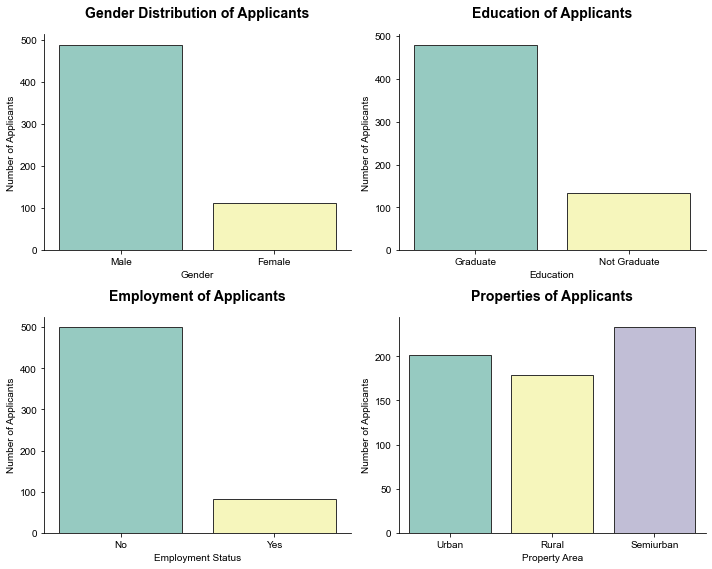

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

sns.set_style('ticks')
sns.countplot(df['Gender'], ax=ax[0][0], edgecolor='.2', palette='Set3')
ax[0][0].set(xlabel="Gender", ylabel='Number of Applicants')
ax[0][0].set_title('Gender Distribution of Applicants', fontsize=14, fontweight='bold', y=1.05)

sns.countplot(df['Education'], ax=ax[0][1], edgecolor='.2', palette='Set3')
ax[0][1].set(xlabel='Education', ylabel='Number of Applicants')
ax[0][1].set_title('Education of Applicants', fontsize=14, fontweight='bold', y=1.05)

sns.countplot(df['Self_Employed'], ax=ax[1][0], edgecolor='.2', palette='Set3')
ax[1][0].set(xlabel='Employment Status', ylabel='Number of Applicants')
ax[1][0].set_title('Employment of Applicants', fontsize=14, fontweight='bold', y=1.05)

sns.countplot(df['Property_Area'], ax=ax[1][1], edgecolor='.2', palette='Set3')
ax[1][1].set(xlabel='Property Area', ylabel='Number of Applicants')
ax[1][1].set_title('Properties of Applicants', fontsize=14, fontweight='bold', y=1.05)

fig.tight_layout()
sns.despine()
plt.show()


Applicants are mostly male, graduates, and not self-employed. Properties are mainly semi-urban. 

<b> How many applicants have credit history that meet requirements? How many applicants has their loans approved and rejected? </b>

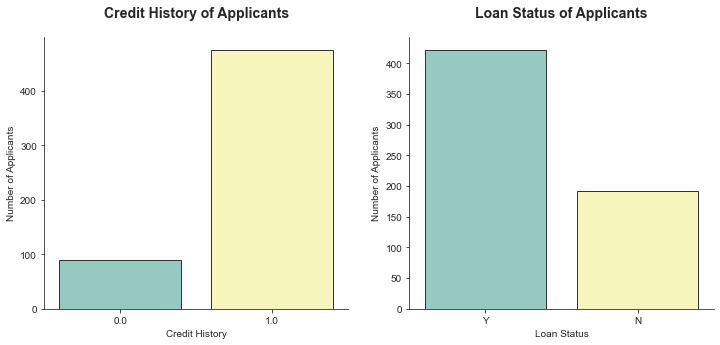

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.countplot(df['Credit_History'], edgecolor='.2', palette='Set3', ax=ax[0])
ax[0].set(xlabel='Credit History', ylabel='Number of Applicants')
ax[0].set_title('Credit History of Applicants', fontweight='bold', fontsize=14, y=1.05)

sns.countplot(df['Loan_Status'], edgecolor='.2', palette='Set3', ax=ax[1])
ax[1].set(xlabel='Loan Status', ylabel='Number of Applicants')
ax[1].set_title('Loan Status of Applicants', fontweight='bold', fontsize=14, y=1.05)

sns.despine()
plt.show()

In [479]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Most applicants have credit history that meets the acceptable standards. Most applicants in the dataset have their loans for their properties approved.

<b> What is the distribution of the numerical variables (applicant income, co-applicant income, loan amount, and loan amount term) </b>

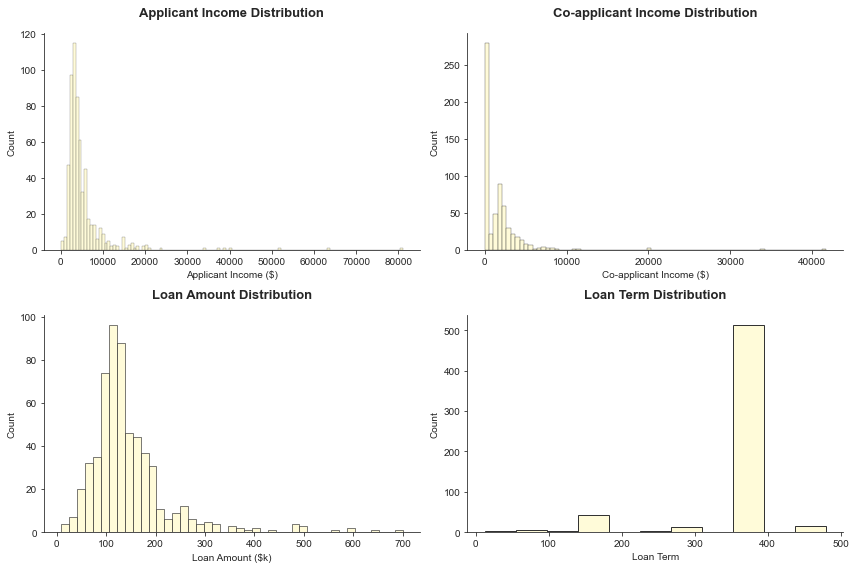

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sns.histplot(data=df, x='ApplicantIncome', ax=ax[0][0], edgecolor='.2', color='lemonchiffon')
ax[0][0].set(xlabel='Applicant Income ($)')
ax[0][0].set_title('Applicant Income Distribution', fontsize=13, fontweight='bold', y=1.05)

sns.histplot(data=df, x='CoapplicantIncome', ax=ax[0][1], edgecolor='.2', color='lemonchiffon')
ax[0][1].set(xlabel='Co-applicant Income ($)')
ax[0][1].set_title('Co-applicant Income Distribution', fontsize=13, fontweight='bold', y=1.05)

sns.histplot(data=df, x='LoanAmount', ax=ax[1][0], edgecolor='.2', color='lemonchiffon')
ax[1][0].set(xlabel='Loan Amount ($k)')
ax[1][0].set_title('Loan Amount Distribution', fontsize=13, fontweight='bold', y=1.05)

sns.histplot(data=df, x='Loan_Amount_Term', ax=ax[1][1], edgecolor='.2', color='lemonchiffon')
ax[1][1].set(xlabel='Loan Term')
ax[1][1].set_title('Loan Term Distribution', fontsize=13, fontweight='bold', y=1.05)

fig.tight_layout()
sns.despine()
plt.show()

As evident from the plots above, incomes and loan amounts of applicants are heavily skewed and indicate the presence of extreme values. This must be taken into account in the data processing stages. Furthermore, most loan terms appear to be 360 months. 

### Exploring Relationships between Input Variables and Target Variables

<b> How do applicant income, co-applicant income, loan amount, and loan term relate with loan eligibility? </b> (Change to radial plots!)

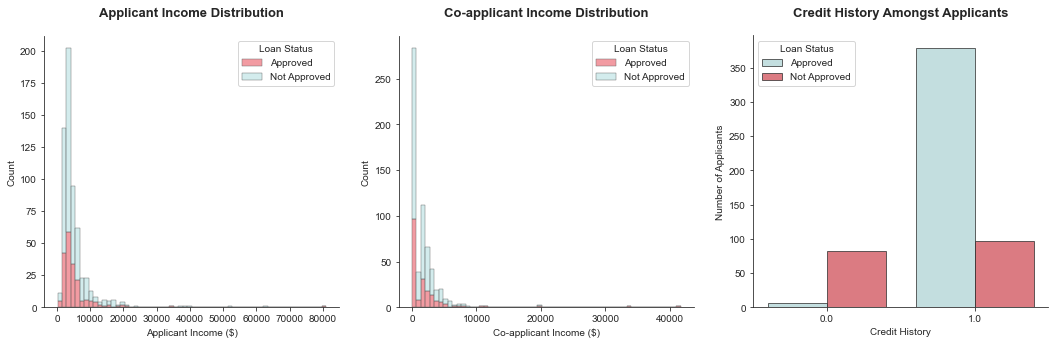

In [447]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
sns.histplot(data=df, x='ApplicantIncome', ax=ax[0], hue='Loan_Status', multiple='stack', palette=["#A8DADC", "#E63946"], edgecolor='.4', alpha=0.5, bins=60)
ax[0].set(xlabel='Applicant Income ($)')
ax[0].set_title('Applicant Income Distribution', fontsize=13, fontweight='bold', y=1.05)
ax[0].legend(title='Loan Status', loc='upper right', labels=['Approved', 'Not Approved'])

sns.histplot(data=df, x='CoapplicantIncome', ax=ax[1], hue='Loan_Status', multiple='stack',  palette=["#A8DADC", "#E63946"], edgecolor='.4', alpha=0.5, bins=60)
ax[1].set(xlabel='Co-applicant Income ($)')
ax[1].set_title('Co-applicant Income Distribution', fontsize=13, fontweight='bold', y=1.05)
ax[1].legend(title='Loan Status', loc='upper right', labels=['Approved', 'Not Approved'])

sns.countplot(x='Credit_History', data=df, hue='Loan_Status', ax=ax[2], palette=["#A8DADC", "#E63946"], edgecolor='.2', alpha=0.75)
ax[2].set(xlabel='Credit History', ylabel='Number of Applicants')
ax[2].set_title('Credit History Amongst Applicants', fontsize=13, fontweight='bold', y=1.05)
ax[2].legend(title='Loan Status', loc='upper left', labels=['Approved', 'Not Approved'])

sns.despine()
plt.show()
fig.savefig('financial_data.png')

In [ ]:
sns.histplot(data=df, x='LoanAmount', ax=ax[2], edgecolor='.2', hue='Loan_Status', multiple='stack')
ax[2].set(xlabel='Loan Amount ($)')
ax[2].set_title('Loan Amount Distribution', fontsize=13, fontweight='bold', y=1.05)


<b> How do categorical variables, namely education, employment status, credit history, and property area, affect loan eligibility? </b>

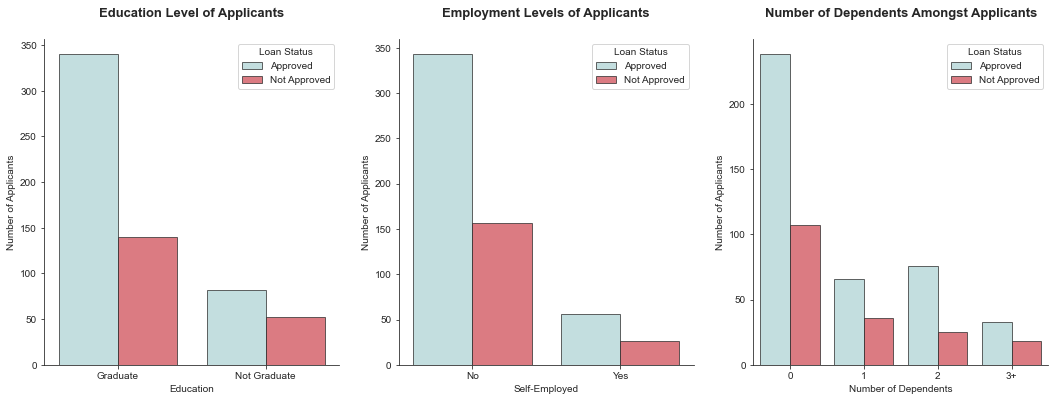

In [427]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.countplot(x='Education', data=df, hue='Loan_Status', ax=ax[0], palette=["#A8DADC", "#E63946"], edgecolor='.2', alpha=0.75)
ax[0].set(xlabel='Education', ylabel='Number of Applicants')
ax[0].set_title('Education Level of Applicants', fontsize=13, fontweight='bold', y=1.05)
ax[0].legend(title='Loan Status', loc='upper right', labels=['Approved', 'Not Approved'])

sns.countplot(x='Self_Employed', data=df, hue='Loan_Status', ax=ax[1], palette=["#A8DADC", "#E63946"], edgecolor='.2', alpha=0.75)
ax[1].set(xlabel='Self-Employed', ylabel='Number of Applicants')
ax[1].set_title('Employment Levels of Applicants', fontsize=13, fontweight='bold', y=1.05)
ax[1].legend(title='Loan Status', loc='upper right', labels=['Approved', 'Not Approved'])

sns.countplot(x='Dependents', data=df, hue='Loan_Status', ax=ax[2], palette=["#A8DADC", "#E63946"], edgecolor='.2', alpha=0.75)
ax[2].set(xlabel='Number of Dependents', ylabel='Number of Applicants')
ax[2].set_title('Number of Dependents Amongst Applicants', fontsize=13, fontweight='bold', y=1.05)
ax[2].legend(title='Loan Status', loc='upper right', labels=['Approved', 'Not Approved'])

sns.despine()
plt.show()

fig.savefig('categorical.png')

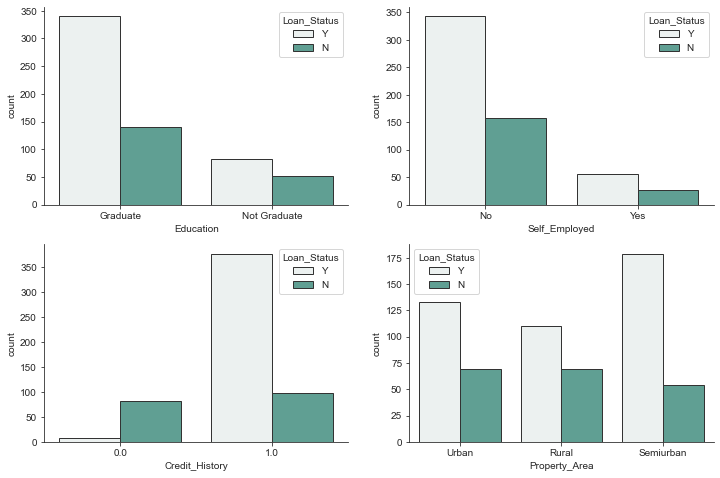

In [353]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sns.countplot(x='Education', data=df, hue='Loan_Status', ax=ax[0][0], palette="light:#5A9", edgecolor='.2')
sns.countplot(x='Self_Employed', data=df, hue='Loan_Status', ax=ax[0][1], palette="light:#5A9", edgecolor='.2')
sns.countplot(x='Credit_History', data=df, hue='Loan_Status', ax=ax[1][0], palette="light:#5A9", edgecolor='.2')
sns.countplot(x='Property_Area', data=df, hue='Loan_Status', ax=ax[1][1], palette="light:#5A9", edgecolor='.2')
sns.despine()
plt.show()

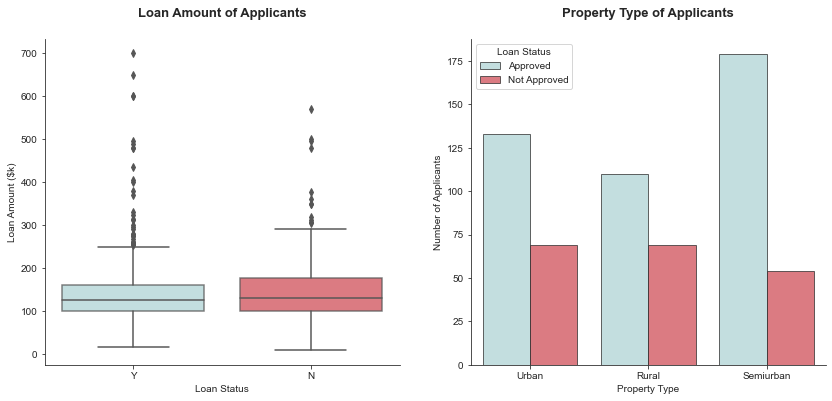

In [460]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

sns.boxplot(x='Loan_Status', y='LoanAmount', data=df, ax=ax[0], palette=["#A8DADC", "#E63946"], boxprops=dict(alpha=0.75))
ax[0].set(xlabel='Loan Status', ylabel='Loan Amount ($k)')
ax[0].set_title("Loan Amount of Applicants", fontsize=13, fontweight='bold', y=1.05)

sns.countplot(x='Property_Area', data=df, hue='Loan_Status', ax=ax[1], palette=["#A8DADC", "#E63946"], edgecolor='.2', alpha=0.75)
ax[1].set(xlabel='Property Type', ylabel='Number of Applicants')
ax[1].set_title('Property Type of Applicants', fontsize=13, fontweight='bold', y=1.05)
ax[1].legend(title='Loan Status', loc='upper left', labels=['Approved', 'Not Approved'])

sns.despine()
fig.savefig('loan_data.png')

## Data Cleaning and Feature Engineering

From our EDA, there are a few things we have to take care of:

1. *Missing Values*: There are missing values for the following variables: gender, marriage status, number of dependents, employment status, loan amount, loan amount term, and credit history. If we had more data, I would personally feel most comfortable dropping rows with missing values. However, since our data is limited, I think it is best if we impute these columns with data. Looking at the patterns in the categorical variables, they seem to lean heavily to a particular group (for instance, the majority of the data is male, not self employed, and graduated), thus we can impute these columns with the most frequent observation. Similarly, because the numerical data is skewed with extreme values, we can impute missing values with the median of the data. 

2. *Extreme Values in Numerical Data*: We can perform a logarithmic transformation of the data to acount for these extreme values, as opposed to treating them as outliers. 

We begin by importing the relevant libraries and removing the Loan ID columns. For the purposes of constructing a simple flask app down the line, I will also convert credit history into a yes or no column to make more intuitive sense for the user input. We can then separate the input features with the targets into variables called X and y. I also label encoded the target features.

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [11]:
df_transformed = df.copy()
df_transformed.drop('Loan_ID', axis=1, inplace=True)
df_transformed.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
def change_credit_history(data):
    if data == float(1):
        return 'Yes'
    elif data == float(0):
        return 'No'

In [13]:
df_transformed['Credit_History'] = df_transformed['Credit_History'].map(change_credit_history)

In [14]:
y = df_transformed['Loan_Status']
X = df_transformed.drop('Loan_Status', axis=1)

In [15]:
label = LabelEncoder()
y = label.fit_transform(y)

**Feature Engineering:** Combine applicant income and co-applicant income to create a total income column. Prepare them for use in pipelines.

In [16]:
class DataframeFunctionTransformer():
    def __init__(self, func):
        self.func = func
        
    def transform(self, input_df, **transform_params):
        return self.func(input_df)
    
    def fit(self, X, y=None, **fit_params):
        return self

In [17]:
class SelectColumnsTransformer():
    def __init__(self, columns=None):
        self.columns = columns

    def transform(self, X, **transform_params):
        cpy_df = X[self.columns].copy()
        return cpy_df

    def fit(self, X, y=None, **fit_params):
        return self

In [18]:
def get_total_income(input_df):
    try: 
        input_df['total_income'] = input_df['ApplicantIncome'] + input_df['CoapplicantIncome']
        input_df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)
    except: 
        pass
    return input_df

In [19]:
def get_log_transform(input_df):
    input_df['total_income'] = np.log10(input_df['total_income'])
    input_df['LoanAmount'] = np.log10(input_df['LoanAmount'])
    return input_df

**Data Cleaning:** Set up imputer strategies to impute numerical features with the median and categorical features with most frequent occurance. One hot encode the categorical variables. Scale the numerical dataset. Set up PCA to reduce categorical features into a set number of principal components and select K-best to identify the k-best columns.

In [20]:
# Simple Imputers
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='median')

In [21]:
# One Hot Encoders for Categorical Variables
ohe = OneHotEncoder(sparse=False)

In [22]:
# Standard Scaler: Scale numerical data
scaler = StandardScaler()

In [23]:
# PCA for Categorical Variables; K-Best for Numerical Variables

#pca = PCA(n_components=3)
#select = SelectKBest(k=3)

**Pipelines:** Implement the feature engineering and data cleaning processes into a pipeline by separating into numerical and categorical features.

In [330]:
all_num_features = ['Loan_Amount_Term', 'LoanAmount', 'ApplicantIncome', 'CoapplicantIncome']
num_features = ['Loan_Amount_Term', 'total_income', 'LoanAmount']
cat_features = ['Gender', 'Married', 'Dependents', 'Education',
                'Self_Employed', 'Credit_History', 'Property_Area']

In [329]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,Yes,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Yes,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Yes,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Yes,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Yes,Urban


In [337]:
numerical_processing = Pipeline([('feature_eng', DataframeFunctionTransformer(get_total_income)),
                                 ('select_cols_num', SelectColumnsTransformer(num_features)),
                                 ('log_transform', DataframeFunctionTransformer(get_log_transform)),
                                 ('impute_median', num_imputer), 
                                ('scale', scaler)])
categorical_processing = Pipeline([('select_cols_cat', SelectColumnsTransformer(cat_features)),
                                    ('impute_common', cat_imputer),
                                   ('ohe', ohe)])

In [338]:
preprocessing = FeatureUnion([('num_process', numerical_processing),
                                ('cat_process', categorical_processing)])

## Predictive Modelling 

### Import Libraries

We begin by importing the necessary libraries for modelling and evaluation. The models we will try are: logistic regression (baseline), decision tress, random forest, gradient boost, K-Neighbors, XGBoost, and a support vector machine classifier.

In [339]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import plot_confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, classification_report, roc_curve

In [340]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import CategoricalNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.ensemble import BalancedRandomForestClassifier
from collections import Counter

### Pipeline and Baseline Model

<b> Baseline Modelling and Prediction </b>

The modelling approach can be implemented in a pipeline, after the preprocessing stage, to avoid data leakage and for easier deployment. We split the data into training and testing dataset and fit the pipeline using training data. We then evaluate our approach using testing data.

I s

In [341]:
logistic = LogisticRegression(class_weight='balanced')
pipeline = Pipeline([('preprocess', preprocessing),
                    ('model', logistic)])

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, stratify=y, random_state=0)

In [343]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 FeatureUnion(transformer_list=[('num_process',
                                                 Pipeline(steps=[('feature_eng',
                                                                  <__main__.DataframeFunctionTransformer object at 0x7fb0a165e690>),
                                                                 ('select_cols_num',
                                                                  <__main__.SelectColumnsTransformer object at 0x7fb0a165e250>),
                                                                 ('log_transform',
                                                                  <__main__.DataframeFunctionTransformer object at 0x7fb0a165e5d0>),
                                                                 ('impute_median',
                                                                  SimpleImputer(strategy='median')),
                                                                 ('scale',
  

<b> Baseline Model Evaluation </b>

In [344]:
pipeline.score(X_test, y_test)

0.8051948051948052

In [217]:
y_pred_baseline = pipeline.predict(X_test)
y_pred_prob_baseline = pipeline.predict_proba(X_test)

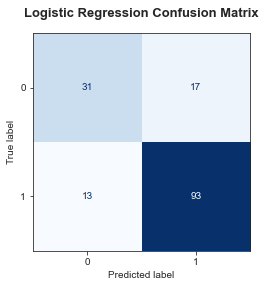

In [473]:
fig = plot_confusion_matrix(pipeline, X_test, y_test, cmap='Blues', colorbar=False)
plt.title('Logistic Regression Confusion Matrix', fontweight='bold', fontsize=13, y=1.05)
plt.show()


In [220]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_baseline[:,1])
straight_x = np.linspace(0, 1, 50)
straight_y = np.linspace(0, 1, 50)

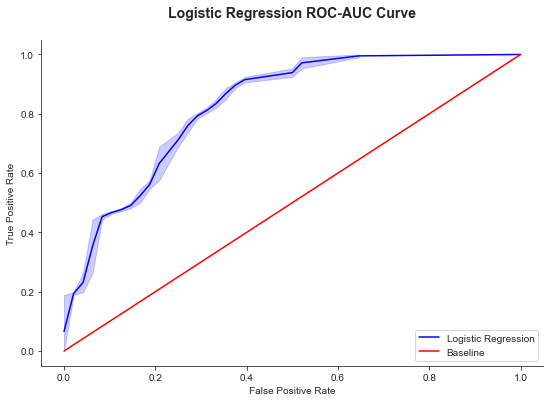

In [478]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(x=fpr, y=tpr, color='b', label='Logistic Regression')
sns.lineplot(x=straight_x, y=straight_y, color='r', label='Baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC-AUC Curve', fontweight='bold', fontsize=14, y=1.05)
plt.legend(loc='lower right')
sns.despine()
plt.show()

fig.savefig('roc_auc_curve.png')

In [222]:
print('The accuracy of the baseline model is:', accuracy_score(y_test, y_pred_baseline))
print('The precision of the baseline model is:', precision_score(y_test, y_pred_baseline))
print('The recall of the baseline model is:', recall_score(y_test, y_pred_baseline))
print('The f1 score of the baseline model is:', f1_score(y_test, y_pred_baseline))
print('The ROC AUC score of the baseline model is:', roc_auc_score(y_test, y_pred_baseline))

The accuracy of the baseline model is: 0.8051948051948052
The precision of the baseline model is: 0.8454545454545455
The recall of the baseline model is: 0.8773584905660378
The f1 score of the baseline model is: 0.861111111111111
The ROC AUC score of the baseline model is: 0.7615959119496855


In [223]:
print(classification_report(y_test, y_pred_baseline))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67        48
           1       0.85      0.88      0.86       106

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154



### Model Iteration

<b> Pipeline and Grid Search For Model Iteration </b>

In [236]:
param = {'model': [LogisticRegression(class_weight='balanced'),DecisionTreeClassifier(class_weight='balanced'),
                  BalancedRandomForestClassifier(),# GradientBoostingClassifier(),, SVC(probability=True)
                  XGBClassifier(scale_pos_weight=0.45)]}

model_search = GridSearchCV(pipeline, param_grid=param, cv=StratifiedKFold(n_splits=5),
                           scoring=['accuracy', 'f1', 'roc_auc'],
                           verbose=8, error_score='raise', refit='accuracy', return_train_score=True)

model_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END model=LogisticRegression(class_weight='balanced'); accuracy: (train=0.758, test=0.750) f1: (train=0.829, test=0.830) roc_auc: (train=0.785, test=0.735) total time=   0.0s
[CV 2/5] END model=LogisticRegression(class_weight='balanced'); accuracy: (train=0.764, test=0.674) f1: (train=0.831, test=0.773) roc_auc: (train=0.796, test=0.683) total time=   0.0s
[CV 3/5] END model=LogisticRegression(class_weight='balanced'); accuracy: (train=0.788, test=0.674) f1: (train=0.852, test=0.762) roc_auc: (train=0.790, test=0.683) total time=   0.0s
[CV 4/5] END model=LogisticRegression(class_weight='balanced'); accuracy: (train=0.720, test=0.761) f1: (train=0.800, test=0.817) roc_auc: (train=0.748, test=0.870) total time=   0.0s
[CV 5/5] END model=LogisticRegression(class_weight='balanced'); accuracy: (train=0.750, test=0.696) f1: (train=0.817, test=0.778) roc_auc: (train=0.803, test=0.656) total time=   0.0s
[CV 1/5] END model=D

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        FeatureUnion(transformer_list=[('num_process',
                                                                        Pipeline(steps=[('feature_eng',
                                                                                         <__main__.DataframeFunctionTransformer object at 0x7fb0638747d0>),
                                                                                        ('select_cols_num',
                                                                                         <__main__.SelectColumnsTransformer object at 0x7fb06387481...
                                                 max_depth=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                            

In [237]:
model_search.best_params_

{'model': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None, gamma=None,
               gpu_id=None, importance_type='gain', interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               random_state=None, reg_alpha=None, reg_lambda=None,
               scale_pos_weight=0.45, subsample=None, tree_method=None,
               validate_parameters=None, verbosity=None)}

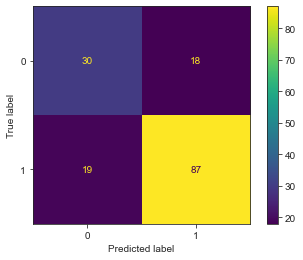

In [238]:
y_pred_svc = model_search.predict(X_test)
y_pred_prob_best = model_search.predict_proba(X_test)
plot_confusion_matrix(model_search, X_test, y_test)
plt.show()

In [239]:
fpr_best, tpr_best, threshold_best = roc_curve(y_test, y_pred_prob_best[:,1])
straight_x = np.linspace(0, 1, 50)
straight_y = np.linspace(0, 1, 50)

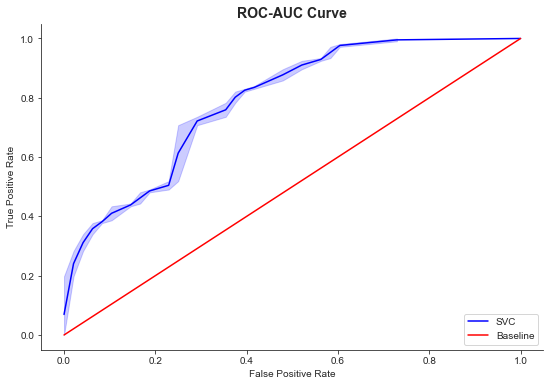

In [240]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(x=fpr_best, y=tpr_best, color='b', label='SVC')
sns.lineplot(x=straight_x, y=straight_y, color='r', label='Baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve', fontweight='bold', fontsize=14)
plt.legend(loc='lower right')
sns.despine()
plt.show()

In [241]:
print('The accuracy of the baseline model is:', accuracy_score(y_test, y_pred_svc))
print('The precision of the baseline model is:', precision_score(y_test, y_pred_svc))
print('The recall of the baseline model is:', recall_score(y_test, y_pred_svc))
print('The f1 score of the baseline model is:', f1_score(y_test, y_pred_svc))
print('The ROC AUC score of the baseline model is:', roc_auc_score(y_test, y_pred_svc))

The accuracy of the baseline model is: 0.7597402597402597
The precision of the baseline model is: 0.8285714285714286
The recall of the baseline model is: 0.8207547169811321
The f1 score of the baseline model is: 0.8246445497630333
The ROC AUC score of the baseline model is: 0.722877358490566


In [242]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.61      0.62      0.62        48
           1       0.83      0.82      0.82       106

    accuracy                           0.76       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.76      0.76      0.76       154



<b> Hyperparameter Tuning on XGBoost Classifier </b>

In [254]:
pipeline_best = Pipeline([('preprocess', preprocessing),
                          ('model', XGBClassifier(scale_pos_weight=0.45, eval_metric='mlogloss'))])

In [256]:
params = [{'model__learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
         'model__max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
         'model__min_child_weight': [ 1, 3, 5, 7 ], 
         'model__gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]}]

search_xgb = GridSearchCV(pipeline_best, param_grid=params, cv=StratifiedKFold(n_splits=5),
                          verbose=0, error_score=np.nan, return_train_score=False)
search_xgb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        FeatureUnion(transformer_list=[('num_process',
                                                                        Pipeline(steps=[('feature_eng',
                                                                                         <__main__.DataframeFunctionTransformer object at 0x7fb0638747d0>),
                                                                                        ('select_cols_num',
                                                                                         <__main__.SelectColumnsTransformer object at 0x7fb063874810>),
                                                                                        ('log_transform'...
                                                      num_parallel_tree=None,
                                                      random_state=None,
 

In [257]:
search_xgb.score(X_test, y_test)

0.7402597402597403

In [259]:
y_pred_xgb_best = search_xgb.predict(X_test)
y_pred_xgb_best_prob = search_xgb.predict_proba(X_test)

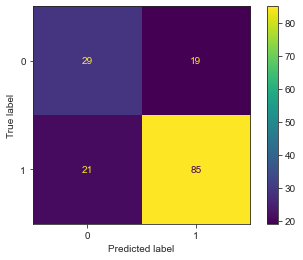

In [260]:
plot_confusion_matrix(search_xgb, X_test, y_test)
plt.show()

In [261]:
fpr_best_xgb, tpr_best_xgb, threshold_best_xgb = roc_curve(y_test, y_pred_prob_best[:,1])
straight_x = np.linspace(0, 1, 50)
straight_y = np.linspace(0, 1, 50)

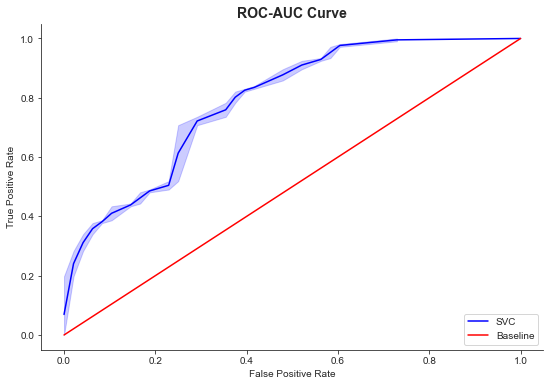

In [262]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(x=fpr_best_xgb, y=tpr_best_xgb, color='b', label='SVC')
sns.lineplot(x=straight_x, y=straight_y, color='r', label='Baseline')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve', fontweight='bold', fontsize=14)
plt.legend(loc='lower right')
sns.despine()
plt.show()

<b> Hyperparameter Tuning on Logistic Regression </b>

In [275]:
param_grid = {'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'model__penalty': ['none', 'l1', 'l2', 'elasticnet'],
              'model__C': [100, 10, 1.0, 0.1, 0.01]}

search_logreg = GridSearchCV(pipeline, param_grid=param_grid, cv=StratifiedKFold(5), scoring='roc_auc')
search_logreg.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        FeatureUnion(transformer_list=[('num_process',
                                                                        Pipeline(steps=[('feature_eng',
                                                                                         <__main__.DataframeFunctionTransformer object at 0x7fb0638747d0>),
                                                                                        ('select_cols_num',
                                                                                         <__main__.SelectColumnsTransformer object at 0x7fb063874810>),
                                                                                        ('log_transform'...
                                                                                         <__main__.SelectColumnsTransformer object at 0x7fb063874790>),


In [276]:
search_logreg.best_params_

{'model__C': 0.1, 'model__penalty': 'l1', 'model__solver': 'liblinear'}

In [277]:
search_logreg.score(X_test, y_test)

0.8199685534591195

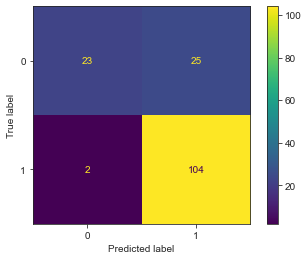

In [278]:
plot_confusion_matrix(search_logreg, X_test, y_test)

In [274]:
print(classification_report(y_test, search_logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.48      0.64        48
           1       0.81      0.99      0.89       106

    accuracy                           0.83       154
   macro avg       0.88      0.73      0.76       154
weighted avg       0.85      0.83      0.81       154



In [279]:
y_pred_logreg = search_logreg.predict(X_test)
y_pred_prob_logreg = search_logreg.predict_proba(X_test)

In [283]:
fpr_logreg, tpr_logreg, threshold_logreg = roc_curve(y_test, y_pred_prob_best[:,1])

In [287]:
gmeans = np.sqrt(tpr_logreg * (1-fpr_logreg))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold_logreg[ix], gmeans[ix]))

Best Threshold=0.706370, G-Mean=0.728


In [311]:
THRESHOLD = 0.50
preds = np.where(pipeline.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

In [312]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67        48
           1       0.85      0.88      0.86       106

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154



## Save the Best Model!

In [315]:
import pickle
filename='logregmodel_balanced.sav'
pickle.dump(pipeline, open(filename, 'wb'))